# Numpy(Numerical Python)

>* 벡터 및 행렬 연산에 특화된 라이브러리
>* array(ndarray)단위로 데이터를 관리한다. 즉, array단위로 연산을 수행한다.
>* 2차원 array는 `행렬 matrix`와 유사하다.
>* Pandas와 같이 데이터분석에 많이 사용한다.
>* `수치해석용` Python 라이브러리

## 참고사이트

* http://numpy.org
* http://docs.scipy.org/doc
* http://www.scipy-lectures.org/intro/numpy/index.html
* http://docs.scipy.org/doc/numpy/user/quickstart.html

## numpy cheat sheet

<img src="./images/22.데이터분석_numpy_00.python_cheat_sheet.png">

In [1]:
import numpy as np
print(np.__version__)
print(dir(np))

1.24.3
['ALLOW_THREADS', 'AxisError', 'BUFSIZE', 'CLIP', 'ComplexWarning', 'DataSource', 'ERR_CALL', 'ERR_DEFAULT', 'ERR_IGNORE', 'ERR_LOG', 'ERR_PRINT', 'ERR_RAISE', 'ERR_WARN', 'FLOATING_POINT_SUPPORT', 'FPE_DIVIDEBYZERO', 'FPE_INVALID', 'FPE_OVERFLOW', 'FPE_UNDERFLOW', 'False_', 'Inf', 'Infinity', 'MAXDIMS', 'MAY_SHARE_BOUNDS', 'MAY_SHARE_EXACT', 'ModuleDeprecationWarning', 'NAN', 'NINF', 'NZERO', 'NaN', 'PINF', 'PZERO', 'RAISE', 'RankWarning', 'SHIFT_DIVIDEBYZERO', 'SHIFT_INVALID', 'SHIFT_OVERFLOW', 'SHIFT_UNDERFLOW', 'ScalarType', 'Tester', 'TooHardError', 'True_', 'UFUNC_BUFSIZE_DEFAULT', 'UFUNC_PYVALS_NAME', 'VisibleDeprecationWarning', 'WRAP', '_CopyMode', '_NoValue', '_UFUNC_API', '__NUMPY_SETUP__', '__all__', '__builtins__', '__cached__', '__config__', '__deprecated_attrs__', '__dir__', '__doc__', '__expired_functions__', '__file__', '__former_attrs__', '__future_scalars__', '__getattr__', '__git_version__', '__loader__', '__mkl_version__', '__name__', '__package__', '__path_

### 1. 1차원 array정의 및 사용하기

In [2]:
# 1. np.array() : 원시데잌터를 numpy 배열로 리턴
# np.array?
data = [1,2,3,4,5]
print(type(data), data)

arr = np.array(data)
print(type(arr), arr)

# 데이터타입이 다른 경우, 강제형변환(upcasting)
data1 = [1,2,3,4.0,5]
arr1 = np.array(data1)
print(type(arr1), arr1)

data2 = [1,2,3,'4',5]
arr2 = np.array(data2)
print(type(arr2), arr2)

data3 = [1,2,3,'4',5, [1,2]]
#  arr3 = np.array(data3) # 에러 : 비동차 (inhomogeneous) 

data4 = [[1,2], [1,2]]
arr4 = np.array(data4)
print(type(arr4), arr4)

<class 'list'> [1, 2, 3, 4, 5]
<class 'numpy.ndarray'> [1 2 3 4 5]
<class 'numpy.ndarray'> [1. 2. 3. 4. 5.]
<class 'numpy.ndarray'> ['1' '2' '3' '4' '5']
<class 'numpy.ndarray'> [[1 2]
 [1 2]]


In [3]:
# np.shape() : ndarray의 크기(모양)를 리턴
# np.shape?
a = 4; b = 4,; c = (4,)
print(type(a), type(b), type(c))

print(arr1.shape)      # 배열의 크기를 tuple로 리턴
print(np.shape(arr1))  # arr1.shape와 동일
help(np.shape)

<class 'int'> <class 'tuple'> <class 'tuple'>
(5,)
(5,)
Help on function shape in module numpy:

shape(a)
    Return the shape of an array.
    
    Parameters
    ----------
    a : array_like
        Input array.
    
    Returns
    -------
    shape : tuple of ints
        The elements of the shape tuple give the lengths of the
        corresponding array dimensions.
    
    See Also
    --------
    len : ``len(a)`` is equivalent to ``np.shape(a)[0]`` for N-D arrays with
          ``N>=1``.
    ndarray.shape : Equivalent array method.
    
    Examples
    --------
    >>> np.shape(np.eye(3))
    (3, 3)
    >>> np.shape([[1, 3]])
    (1, 2)
    >>> np.shape([0])
    (1,)
    >>> np.shape(0)
    ()
    
    >>> a = np.array([(1, 2), (3, 4), (5, 6)],
    ...              dtype=[('x', 'i4'), ('y', 'i4')])
    >>> np.shape(a)
    (3,)
    >>> a.shape
    (3,)



### 2. 2차원 array(행렬, matrix)

In [4]:
# 1. np.array()
# 2차원list를 2차원 ndarray로 리턴
data = [[1,2,3],[4,5.0,6]]
arr = np.array(data)
print(type(arr), arr.shape, arr)

# 3 x 3 행렬
arr1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(type(arr), arr1.shape, arr1)

# 요소의 갯수가 다를 경우는 에러 발생
arr2 = np.array([[1,2,3],[4,5,6],[7,8]]) # 비동차

<class 'numpy.ndarray'> (2, 3) [[1. 2. 3.]
 [4. 5. 6.]]
<class 'numpy.ndarray'> (3, 3) [[1 2 3]
 [4 5 6]
 [7 8 9]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

### 3. numpy 연산

>* numpy의 배열은 리스와 유사하지만 다음과 같은 점에서 다르다.
>* `모든 요소가 동일 자료형`이어야 한다.
>* `요소의 갯수는 변경할 수 없다`

#### numpy datatype

1. int(8,16,32,64)     : 부호가 있는 정수
1. uint(8,16,32,64)    : 부호가 없는 정수
1. float(16,32,64,128) : 실수
1. complex(64,128,256) : 복소수
1. bool : boolean
1. string
1. object
1. unicode

In [5]:
# 1. numpy의 연산
arr1 = np.array([[1,2,3],[4,5,6]])
arr2 = np.array([[7,8,9],[10,11,12]])

# numpy의 사칙연산
print(f"numpy 더하기 = {arr1 + arr2}")
print(f"numpy 빼기   = {arr1 - arr2}")
print(f"numpy 곱하기 = {arr1 * arr2}")
print(f"numpy 나누기 = {arr1 / arr2}")
print()

# 제곱, 제곱근
print(f"arr1에 2배 = {arr1 * 2}")
print(f"arr1에 2배 = {arr1 ** 2}")

numpy 더하기 = [[ 8 10 12]
 [14 16 18]]
numpy 빼기   = [[-6 -6 -6]
 [-6 -6 -6]]
numpy 곱하기 = [[ 7 16 27]
 [40 55 72]]
numpy 나누기 = [[0.14285714 0.25       0.33333333]
 [0.4        0.45454545 0.5       ]]

arr1에 2배 = [[ 2  4  6]
 [ 8 10 12]]
arr1에 2배 = [[ 1  4  9]
 [16 25 36]]


###### numpy array broadcasting

* numpy에서는 기본적으로 동일 크기를 가져야 연산이 가능하지만 배열의 크리가 다를 경우에는
* numpy가 `broadcasting`라는 기능을 제공한다.
* 즉, broadcasting은 서로 크기가 다른 numpy배열의 연산이 가능하도록 지원하는 기능이다.

<img src="./images/22.데이터분석_numpy_01_broadcasting.png">
<img src="./images/22.데이터분석_numpy_02_broadcasting.png">

In [6]:
# 2. broadcasting
arr1 = np.array([[1,2,3],[4,5,6]]) # 2차원 3x3
arr2 = np.array([10,11,12])        # 1차원 3,

# numpy의 사칙연산
print(f"numpy 더하기 = {arr1 + arr2}")
print(f"numpy 빼기   = {arr1 - arr2}")
print(f"numpy 곱하기 = {arr1 * arr2}")
print(f"numpy 나누기 = {arr1 / arr2}")
print()

# 제곱, 제곱근
print(f"arr1에 2배 = {arr1 * 2}")
print(f"arr1에 2배 = {arr1 ** 2}")

numpy 더하기 = [[11 13 15]
 [14 16 18]]
numpy 빼기   = [[-9 -9 -9]
 [-6 -6 -6]]
numpy 곱하기 = [[10 22 36]
 [40 55 72]]
numpy 나누기 = [[0.1        0.18181818 0.25      ]
 [0.4        0.45454545 0.5       ]]

arr1에 2배 = [[ 2  4  6]
 [ 8 10 12]]
arr1에 2배 = [[ 1  4  9]
 [16 25 36]]


### 4. numpy array의 slicing과 indexing

* numpy에서 사용되는 indexing은 python에서의 indexing과 동일하다.
* numpy의 indexing은 0부터 시작한다.

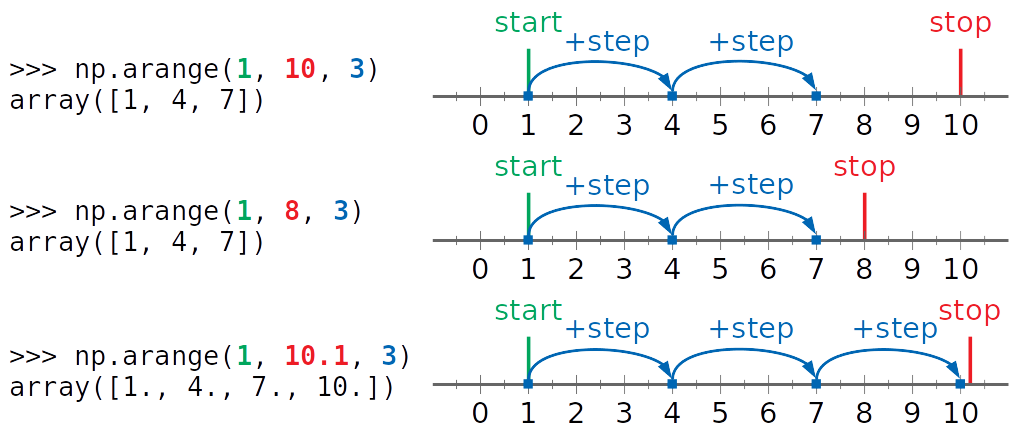

In [7]:
# 1. np.arange([start, ] stop [,step], dtype=None)함수 
# ndarry를 생성해 주는 함수, range()함수와 유사한 함수
# np.arange?
from IPython.display import Image
display(Image("./images/22.데이터분석_numpy_03_arange.png", width=500, height=300))

In [8]:
arr1 = np.arange(10,20,2,dtype='float64')
print(type(arr1), '\n', arr1)

# 1) 1차원 indexing, slicing
arr1 = np.arange(10)
print(type(arr1), arr1)
print(type(arr1[9]), arr1[9])
print(type(arr1[:3]), arr1[:3])
print(type(arr1[3:]), arr1[3:])
print(type(arr1[:-3]), arr1[:-3])
print(type(arr1[:]), arr1[:])

<class 'numpy.ndarray'> 
 [10. 12. 14. 16. 18.]
<class 'numpy.ndarray'> [0 1 2 3 4 5 6 7 8 9]
<class 'numpy.int32'> 9
<class 'numpy.ndarray'> [0 1 2]
<class 'numpy.ndarray'> [3 4 5 6 7 8 9]
<class 'numpy.ndarray'> [0 1 2 3 4 5 6]
<class 'numpy.ndarray'> [0 1 2 3 4 5 6 7 8 9]


In [9]:
# 2) 2차원 indexing, slicing
# list인덱싱과 슬라이싱
l = [[1,2,3],[4,5,6]]
print(l[0][0:2])

# numpy인덱싱과 슬라이싱 2차원[행,요소위치]
# a. indexing
arr2 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr2[0,0],arr2[0,1],arr2[0,2])
print(arr2[1,0],arr2[1,1],arr2[1,2])
print(arr2[2,0],arr2[2,1],arr2[2,2])
print()

# b. slicing [:,:]
# 요소를 꺼내기
# 다차원배열의 원소중 복수개의 값을 추출하려면 slicing과 함께 컴마(,)를 사용해야 한다.
print(arr2[0,])  # 첫 번쨰행의 전체열
print(arr2[0,:]) # 첫 번쨰행의 전체열
print(arr2[:,:]) # 모든행의 모든열 :[행,열] -> 슬라이싱 [:,:]
print()

print(arr2[1,1])# 실습1. 2번째행의 2번째요소 추출
print(arr2[:2,:2])# 실습2. 1~2번째행의 1~2요소(열)을 추출
print()

print(arr2[:,:], '\n', arr2[:]) # 동일의미 즉 전체요소
print()

print(arr2[2:])   # 2차원
print(arr2[2,:])  # 1차원

[1, 2]
1 2 3
4 5 6
7 8 9

[1 2 3]
[1 2 3]
[[1 2 3]
 [4 5 6]
 [7 8 9]]

5
[[1 2]
 [4 5]]

[[1 2 3]
 [4 5 6]
 [7 8 9]] 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

[[7 8 9]]
[7 8 9]


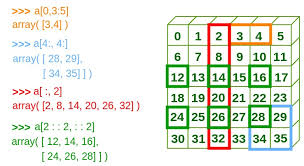

In [10]:
display(Image("./images/22.데이터분석_numpy_04_slicing.png", width=500, height=300))

In [11]:
# https://www.geeksforgeeks.org/numpy-indexing/

# 실습문제
arr2 = np.array([[1,2,3],[4,5,6],[7,8,9]])

# 1. arr2에서 9를 꺼내기 : 세 번째 행의 세 번째 요소
print(arr2[2:,2] , ' = ', arr2[-1:,-1])

# 2. arr2에서 모든열의 세번째 요소 [3,6,9] 출력
print(arr2[:,2] , ' = ', arr2[:,-1])

# 3. arr2에서 [[1,2], [4,5]] 출력
print(arr2[:2,:2])

# 4. arr2에서 [[5,6], [8,9]] 출력
print(arr2[1:,1:])
print()

m = np.array([[ 0,  1,  2,  3,  4],
              [ 5,  6,  7,  8,  9],
              [10, 11, 12, 13, 14]])

# 5. m 행렬에서 값 7 을 인덱싱한다.
print(m[1,2])

# 6. m 행렬에서 배열 [6, 7] 을 슬라이싱한다.
print(m[1,1:3])

# 7. m 행렬에서 배열 [7, 12] 을 슬라이싱한다.
print(m[1:3,2:3])

# 8. m 행렬에서 배열 [[3, 4], [8, 9]] 을 슬라이싱한다.
print(m[0:2,3:5])
print(m[0:2,3:])

[9]  =  [9]
[3 6 9]  =  [3 6 9]
[[1 2]
 [4 5]]
[[5 6]
 [8 9]]

7
[6 7]
[[ 7]
 [12]]
[[3 4]
 [8 9]]
[[3 4]
 [8 9]]


##### 배열인덱싱

* numpy배열 객체의 강력한 기능은 `fancy indexing이라 불리는 배열인덱싱`이다.
* 인덱싱이란 이름이 부여 됬지만 사실은 데이터베이스의 Query기능을 수행한다.
* 배열인덱싱은 2가지가 있다.
  1. 정수배열방식
  2. 블리언배열방식
  
* 블리언배열방식은 배열의 원소가 True or False 두가지 값으로만 구성되며 인덱스 배열의 크기가 원래의 ndarry객체의 크기와 동일해야 한다.

In [12]:
# 1차원 배열인덱싱(블리언)
a = np.array([1,2,3,4,5,6,7,8,9,10])
# idx = np.array([True, True,True, True,True, True,True, True,True, True])
idx = np.array([False, True, False, False,False, False,False, False, True, False])
print(a, '\n', idx)
print()

# 1과 8만 추출하기
print(a[idx])

# 짝수만 추출하기
print(a%2==0)
print(a[a%2==0])

# 홀수만 추출
print(a[a%3==0])

[ 1  2  3  4  5  6  7  8  9 10] 
 [False  True False False False False False False  True False]

[2 9]
[False  True False  True False  True False  True False  True]
[ 2  4  6  8 10]
[3 6 9]


In [13]:
# 2차원 배열인덱싱(블리언)
a = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9,10,11,12]
])
print(a)

# 실습 1,5,9,4,8,12만 추출하기
a[:,[True, False, False, True]]

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


array([[ 1,  4],
       [ 5,  8],
       [ 9, 12]])

In [14]:
a = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9,10,11,12]
])
print(a)

# 실습 2,5,7,10만 추출하기
idx = np.array([
    [False, True, False, False],
    [True, False, True, False],
    [False, True, False, False],
])
print(a[idx])

# 짝수만 추출하기
print(a[a%2==0])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[ 2  5  7 10]
[ 2  4  6  8 10 12]


### 5. numpy관련함수

#### 1. 한 개의 array에 적용되는 함수

In [15]:
# 1. zeros() : 배열을 0으로 초기화
z1 = np.zeros(10)
print(z1)

z2 = np.zeros((3,3)) # tuple or list
print(z2)

z3 = np.zeros([3,5], dtype='int64')
print(z3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [16]:
# 2. ones() : 배열을 1으로 초기화
z1 = np.ones(10)
print(z1)

z2 = np.ones((3,3)) # tuple or list
print(z2)

z3 = np.ones([3,5], dtype='int64')
print(z3)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [17]:
# 3. arange()
print(np.arange(10,20,2, dtype=int))

[10 12 14 16 18]


In [18]:
# 4. random()
# 1) seed
# 특정한 시작값을 정의하지 않으면 프로그램이 실행될 때 마다 무작위로 난수가 발생하게 된다.
# 하지만, 임의의 시작값을 설정해주면 랜덤 알로리즘은 동일한 난수를 생성한다.
# 이 임의의 값을 seed값이라고 한다. 이를 위해서 파이썬에서는 random모듈에 seed(임의의 값)함수를
# 제공하는 데 보통 0보다 큰 값으로 설정한다.
np.random.seed(42)
result = np.random.rand(5)
print(result)
print()

# 2) 난수를 생성하는 3가지 방법
# a. rand() : 0~1사이의 균등분포를 가진 난수를 발생
print(np.random.rand(10))
print(np.random.rand(3,5))
print()

# b. randn() : 표준정규분포(가우시안)
print(np.random.randn(10))
print(np.random.randn(3,5))
print()

# c. randint() : 균일분포의 정수값의 난수
print(np.random.randint(10))
print(np.random.randint(10, size=10))
print(np.random.randint(10, 20, size=(3,5)))
print()


[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]

[0.15599452 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449
 0.96990985 0.83244264 0.21233911 0.18182497]
[[0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]
 [0.78517596 0.19967378 0.51423444 0.59241457 0.04645041]]

[-1.15099358  0.37569802 -0.60063869 -0.29169375 -0.60170661  1.85227818
 -0.01349722 -1.05771093  0.82254491 -1.22084365]
[[ 0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658]
 [ 0.17136828 -0.11564828 -0.3011037  -1.47852199 -0.71984421]
 [-0.46063877  1.05712223  0.34361829 -1.76304016  0.32408397]]

0
[8 6 8 7 0 7 7 2 0 7]
[[12 12 10 14 19]
 [16 19 18 16 18]
 [17 11 10 16 16]]



In [19]:
# 5. abs()
arr1 = np.random.randn(5,3)
print(arr1)
print()

print(np.abs(arr1))

[[-0.38508228  1.21217234  1.2334968 ]
 [-1.57415529  0.63795294 -2.04442302]
 [ 1.06948089 -0.93376284  0.78420819]
 [-0.61487576  0.33289244 -1.38071702]
 [-0.28080629 -0.05981726  0.96117377]]

[[0.38508228 1.21217234 1.2334968 ]
 [1.57415529 0.63795294 2.04442302]
 [1.06948089 0.93376284 0.78420819]
 [0.61487576 0.33289244 1.38071702]
 [0.28080629 0.05981726 0.96117377]]


In [20]:
# 6. square() : 각 요소에 제곱근
print(np.square(arr1))

[[1.48288363e-01 1.46936179e+00 1.52151437e+00]
 [2.47796487e+00 4.06983958e-01 4.17966549e+00]
 [1.14378937e+00 8.71913043e-01 6.14982482e-01]
 [3.78072200e-01 1.10817377e-01 1.90637950e+00]
 [7.88521734e-02 3.57810503e-03 9.23855009e-01]]


In [21]:
# 7. exp() : 각 요소의 수를 e지수로 연산
print(np.exp(arr1))

[[0.68039465 3.36077749 3.43321385]
 [0.20718249 1.89260265 0.12945486]
 [2.91386648 0.39307186 2.19067165]
 [0.54070807 1.39499725 0.25139823]
 [0.75517461 0.94193664 2.61476379]]


In [24]:
# 8. log(), log19(), log2()
# 자연로그, 상용로그 밑2인로그
print(np.log(arr1))
print(np.log10(arr1))
print(np.log2(arr1))

[[        nan  0.19241407  0.20985307]
 [        nan -0.44949076         nan]
 [ 0.06717338         nan -0.24308075]
 [        nan -1.09993584         nan]
 [        nan         nan -0.03960007]]
[[        nan  0.08356437  0.09113803]
 [        nan -0.19521135         nan]
 [ 0.02917303         nan -0.10556863]
 [        nan -0.47769607         nan]
 [        nan         nan -0.01719809]]
[[        nan  0.27759483  0.30275398]
 [        nan -0.64847808         nan]
 [ 0.0969107          nan -0.35069139]
 [        nan -1.58687199         nan]
 [        nan         nan -0.05713082]]


C:\Users\gilbaek\AppData\Local\Temp\ipykernel_16224\367969473.py:3: RuntimeWarning: invalid value encountered in log
  print(np.log(arr1))
C:\Users\gilbaek\AppData\Local\Temp\ipykernel_16224\367969473.py:4: RuntimeWarning: invalid value encountered in log10
  print(np.log10(arr1))
C:\Users\gilbaek\AppData\Local\Temp\ipykernel_16224\367969473.py:5: RuntimeWarning: invalid value encountered in log2
  print(np.log2(arr1))


In [27]:
# 9. sign() : 배열의 요소값이 음수일 경우 -1, 0일 경우 0, 양수일 경우 1을 리턴
print(np.sign(-10))
print(np.sign(0))
print(np.sign(10))
print(np.sign(arr1))

-1
0
1
[[-1.  1.  1.]
 [-1.  1. -1.]
 [ 1. -1.  1.]
 [-1.  1. -1.]
 [-1. -1.  1.]]


In [28]:
# 10. ceil()
print(np.ceil(arr1))

[[-0.  2.  2.]
 [-1.  1. -2.]
 [ 2. -0.  1.]
 [-0.  1. -1.]
 [-0. -0.  1.]]


In [29]:
# 11. floor()
print(np.ceil(arr1))

[[-0.  2.  2.]
 [-1.  1. -2.]
 [ 2. -0.  1.]
 [-0.  1. -1.]
 [-0. -0.  1.]]


In [32]:
# 12. isnan() : 각 요소의 값이 NaN일 경우는 True 아닐 경우 False
print(arr1)
print(np.isnan(arr1))
print(np.isnan(np.log(arr1)))

[[-0.38508228  1.21217234  1.2334968 ]
 [-1.57415529  0.63795294 -2.04442302]
 [ 1.06948089 -0.93376284  0.78420819]
 [-0.61487576  0.33289244 -1.38071702]
 [-0.28080629 -0.05981726  0.96117377]]
[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]]
[[ True False False]
 [ True False  True]
 [False  True False]
 [ True False  True]
 [ True  True False]]


C:\Users\gilbaek\AppData\Local\Temp\ipykernel_16224\1044230081.py:4: RuntimeWarning: invalid value encountered in log
  print(np.isnan(np.log(arr1)))


In [35]:
# 13. cos(), sin(), tan(), cosh(), sinh(), tanh()
print(dir(np))
np.tanh?

['ALLOW_THREADS', 'AxisError', 'BUFSIZE', 'CLIP', 'ComplexWarning', 'DataSource', 'ERR_CALL', 'ERR_DEFAULT', 'ERR_IGNORE', 'ERR_LOG', 'ERR_PRINT', 'ERR_RAISE', 'ERR_WARN', 'FLOATING_POINT_SUPPORT', 'FPE_DIVIDEBYZERO', 'FPE_INVALID', 'FPE_OVERFLOW', 'FPE_UNDERFLOW', 'False_', 'Inf', 'Infinity', 'MAXDIMS', 'MAY_SHARE_BOUNDS', 'MAY_SHARE_EXACT', 'ModuleDeprecationWarning', 'NAN', 'NINF', 'NZERO', 'NaN', 'PINF', 'PZERO', 'RAISE', 'RankWarning', 'SHIFT_DIVIDEBYZERO', 'SHIFT_INVALID', 'SHIFT_OVERFLOW', 'SHIFT_UNDERFLOW', 'ScalarType', 'Tester', 'TooHardError', 'True_', 'UFUNC_BUFSIZE_DEFAULT', 'UFUNC_PYVALS_NAME', 'VisibleDeprecationWarning', 'WRAP', '_CopyMode', '_NoValue', '_UFUNC_API', '__NUMPY_SETUP__', '__all__', '__builtins__', '__cached__', '__config__', '__deprecated_attrs__', '__dir__', '__doc__', '__expired_functions__', '__file__', '__former_attrs__', '__future_scalars__', '__getattr__', '__git_version__', '__loader__', '__mkl_version__', '__name__', '__package__', '__path__', '__

#### 2. 두 개의 array에 적용되는 함수

In [38]:
np.random.seed(42)
arr1 = np.random.randn(5,3)
arr2 = np.random.randn(5,3)
print(arr1)
print()

print(arr2)

[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783]]

[[-0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877]
 [-0.2257763   0.0675282  -1.42474819]
 [-0.54438272  0.11092259 -1.15099358]
 [ 0.37569802 -0.60063869 -0.29169375]]


In [41]:
# 1. 4칙연산(add, subtract, multiply, divide)
print(f'numpy 배열 더하기 = \n{np.add(arr1, arr2)}')
print(f'numpy 배열 뺴기   = \n{np.subtract(arr1, arr2)}')
print(f'numpy 배열 곱하기 = \n{np.multiply(arr1, arr2)}')
print(f'numpy 배열 나누기 = \n{np.divide(arr1, arr2)}')

numpy 배열 더하기 = 
[[-6.55733762e-02 -1.15109542e+00  9.61935871e-01]
 [ 6.15005781e-01 -1.64645708e+00  1.23151181e+00]
 [ 1.35343652e+00  8.34962934e-01 -1.89422257e+00]
 [-1.82268094e-03 -3.52495103e-01 -1.61672333e+00]
 [ 6.17660290e-01 -2.51391893e+00 -2.01661158e+00]]
numpy 배열 뺴기   = 
[[ 1.05900168  0.87456682  0.33344121]
 [ 2.43105393  1.17815033 -1.69978573]
 [ 1.80498912  0.69990652  0.9552738 ]
 [ 1.08694277 -0.57434028  0.68526382]
 [-0.13373575 -1.31264155 -1.43322408]]
numpy 배열 곱하기 = 
[[-0.27929617  0.14003839  0.2035344 ]
 [-1.38294778  0.33069568 -0.34316254]
 [-0.35654883  0.05182349  0.66888278]
 [-0.29536031 -0.05140349  0.53605196]
 [ 0.09090475  1.14919014  0.50314775]]
numpy 배열 나누기 = 
[[-0.88338106  0.13651269  2.06107887]
 [-1.67730118  0.16579534 -0.1597497 ]
 [-6.99459072 11.36465471  0.32951394]
 [-0.99665184 -4.17784776  0.4046328 ]
 [ 0.64403393  3.18540959  5.91345489]]


In [44]:
# 2. mininu()/maxinum() : 최소값/최대값 
print(f'numpy 배열에서 최소값 = \n{np.minimum(arr1, arr2)}')
print(f'numpy 배열에서 최대값 = \n{np.maximum(arr1, arr2)}')

numpy 배열에서 최소값 = 
[[-0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037  -0.23413696]
 [-0.2257763   0.0675282  -1.42474819]
 [-0.54438272 -0.46341769 -1.15099358]
 [ 0.24196227 -1.91328024 -1.72491783]]
numpy 배열에서 최대값 = 
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337  1.46564877]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004  0.11092259 -0.46572975]
 [ 0.37569802 -0.60063869 -0.29169375]]


#### 3. 통계 함수

* 통계함수를 통해서 numpy배열의 합, 평균, 분산등을 구할 때 사용하는 함수다.
* 열의 합(분산...) or 행의 합(분산...)등을 쉽게 산출할 수가 있다.

In [51]:
# 1. sum()
# np.sum? : axis=[Nonn|0|1] -> None 전체합, 0 열의 합, 1 행의 합
print(np.shape(arr1))
print(f'numpy 배열의 전체 합(axis=None) = {np.sum(arr1)}')
print(f'numpy 배열의 열의 합(axis=0)    = {np.sum(arr1, axis=0)}')
print(f'numpy 배열의 행의 합(axis=1)    = {np.sum(arr1, axis=1)}')
print()

a = [[1,2,3],[4,5,6]]
print(f'numpy 배열의 전체 합(axis=None) = {np.sum(a)}')
print(f'numpy 배열의 열의 합(axis=0)    = {np.sum(a, axis=0)}')
print(f'numpy 배열의 행의 합(axis=1)    = {np.sum(a, axis=1)}')

(5, 3)
numpy 배열의 전체 합(axis=None) = 0.1552278650000467
numpy 배열의 열의 합(axis=0)    = [ 4.38347914 -1.98168088 -2.24657039]
numpy 배열의 행의 합(axis=1)    = [ 1.00613839  1.05473952  1.87717316 -0.3865874  -3.39623581]

numpy 배열의 전체 합(axis=None) = 21
numpy 배열의 열의 합(axis=0)    = [5 7 9]
numpy 배열의 행의 합(axis=1)    = [ 6 15]


In [52]:
# 2. mean()
print(f'numpy 배열의 전체 평균(axis=None) = {np.mean(arr1)}')
print(f'numpy 배열의 열의 평균(axis=0)    = {np.mean(arr1, axis=0)}')
print(f'numpy 배열의 행의 평균(axis=1)    = {np.mean(arr1, axis=1)}')
print()

a = [[1,2,3],[4,5,6]]
print(f'numpy 배열의 전체 평균(axis=None) = {np.mean(a)}')
print(f'numpy 배열의 열의 평균(axis=0)    = {np.mean(a, axis=0)}')
print(f'numpy 배열의 행의 평균(axis=1)    = {np.mean(a, axis=1)}')

numpy 배열의 전체 평균(axis=None) = 0.010348524333336447
numpy 배열의 열의 평균(axis=0)    = [ 0.87669583 -0.39633618 -0.44931408]
numpy 배열의 행의 평균(axis=1)    = [ 0.33537946  0.35157984  0.62572439 -0.12886247 -1.1320786 ]

numpy 배열의 전체 평균(axis=None) = 3.5
numpy 배열의 열의 평균(axis=0)    = [2.5 3.5 4.5]
numpy 배열의 행의 평균(axis=1)    = [2. 5.]


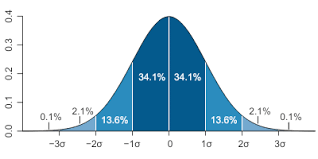

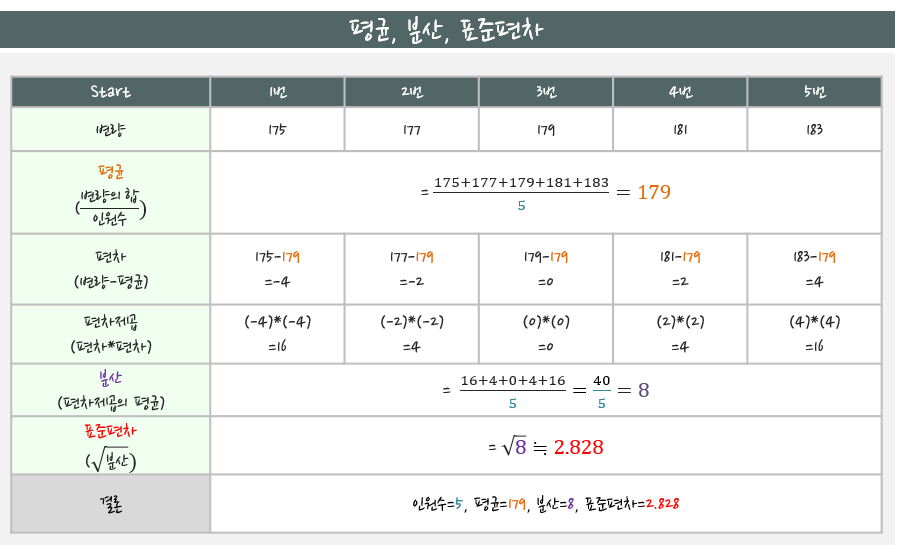

In [54]:
# 3. std() 표준편차, var() 분산, min() 최소값, max() 최대값, median() 중앙값, percentil() 사분위수
display(Image("./images/22.데이터분석_numpy_05_statistic.png", width=500, height=300))
display(Image("./images/22.데이터분석_numpy_06_statistic.png", width=500, height=300))

In [55]:
# 1) std()
print(f'numpy 배열의 표준편차(axis=None) = {np.std(arr1)}')
print(f'numpy 배열의 표준편차(axis=0)    = {np.std(arr1, axis=0)}')
print(f'numpy 배열의 표준편차(axis=1)    = {np.std(arr1, axis=1)}')
print()

a = [[1,2,3],[4,5,6]]
print(f'numpy 배열의 표준편차(axis=None) = {np.std(a)}')
print(f'numpy 배열의 표준편차(axis=0)    = {np.std(a, axis=0)}')
print(f'numpy 배열의 표준편차(axis=1)    = {np.std(a, axis=1)}')

numpy 배열의 표준편차(axis=None) = 0.9604457089189911
numpy 배열의 표준편차(axis=0)    = [0.56039223 0.86635862 0.75862465]
numpy 배열의 표준편차(axis=1)    = [0.34054087 0.82834025 0.84235431 0.47476835 0.97463201]

numpy 배열의 표준편차(axis=None) = 1.707825127659933
numpy 배열의 표준편차(axis=0)    = [1.5 1.5 1.5]
numpy 배열의 표준편차(axis=1)    = [0.81649658 0.81649658]


In [56]:
# 2) var()
print(f'numpy 배열의 분산(axis=None) = {np.var(arr1)}')
print(f'numpy 배열의 분산(axis=0)    = {np.var(arr1, axis=0)}')
print(f'numpy 배열의 분산(axis=1)    = {np.var(arr1, axis=1)}')
print()

a = [[1,2,3],[4,5,6]]
print(f'numpy 배열의 분산(axis=None) = {np.var(a)}')
print(f'numpy 배열의 분산(axis=0)    = {np.var(a, axis=0)}')
print(f'numpy 배열의 분산(axis=1)    = {np.var(a, axis=1)}')

numpy 배열의 분산(axis=None) = 0.9224559597809032
numpy 배열의 분산(axis=0)    = [0.31403946 0.75057726 0.57551136]
numpy 배열의 분산(axis=1)    = [0.11596809 0.68614757 0.70956079 0.22540499 0.94990756]

numpy 배열의 분산(axis=None) = 2.9166666666666665
numpy 배열의 분산(axis=0)    = [2.25 2.25 2.25]
numpy 배열의 분산(axis=1)    = [0.66666667 0.66666667]


In [57]:
# 3) min()
print(f'numpy 배열의 최소값(axis=None) = {np.min(arr1)}')
print(f'numpy 배열의 최소값(axis=0)    = {np.min(arr1, axis=0)}')
print(f'numpy 배열의 최소값(axis=1)    = {np.min(arr1, axis=1)}')
print()

a = [[1,2,3],[4,5,6]]
print(f'numpy 배열의 최소값(axis=None) = {np.min(a)}')
print(f'numpy 배열의 최소값(axis=0)    = {np.min(a, axis=0)}')
print(f'numpy 배열의 최소값(axis=1)    = {np.min(a, axis=1)}')

numpy 배열의 최소값(axis=None) = -1.913280244657798
numpy 배열의 최소값(axis=0)    = [ 0.24196227 -1.91328024 -1.72491783]
numpy 배열의 최소값(axis=1)    = [-0.1382643  -0.23415337 -0.46947439 -0.46572975 -1.91328024]

numpy 배열의 최소값(axis=None) = 1
numpy 배열의 최소값(axis=0)    = [1 2 3]
numpy 배열의 최소값(axis=1)    = [1 4]


In [58]:
# 4) max()
print(f'numpy 배열의 최대값(axis=None) = {np.max(arr1)}')
print(f'numpy 배열의 최대값(axis=0)    = {np.max(arr1, axis=0)}')
print(f'numpy 배열의 최대값(axis=1)    = {np.max(arr1, axis=1)}')
print()

a = [[1,2,3],[4,5,6]]
print(f'numpy 배열의 최대값(axis=None) = {np.max(a)}')
print(f'numpy 배열의 최대값(axis=0)    = {np.max(a, axis=0)}')
print(f'numpy 배열의 최대값(axis=1)    = {np.max(a, axis=1)}')

numpy 배열의 최대값(axis=None) = 1.5792128155073915
numpy 배열의 최대값(axis=0)    = [1.57921282 0.76743473 0.64768854]
numpy 배열의 최대값(axis=1)    = [0.64768854 1.52302986 1.57921282 0.54256004 0.24196227]

numpy 배열의 최대값(axis=None) = 6
numpy 배열의 최대값(axis=0)    = [4 5 6]
numpy 배열의 최대값(axis=1)    = [3 6]


In [59]:
# 5) median()
print(f'numpy 배열의 중앙값(axis=None) = {np.median(arr1)}')
print(f'numpy 배열의 중앙값(axis=0)    = {np.median(arr1, axis=0)}')
print(f'numpy 배열의 중앙값(axis=1)    = {np.median(arr1, axis=1)}')
print()

a = [[1,2,3],[4,5,6]]
print(f'numpy 배열의 중앙값(axis=None) = {np.median(a)}')
print(f'numpy 배열의 중앙값(axis=0)    = {np.median(a, axis=0)}')
print(f'numpy 배열의 중앙값(axis=1)    = {np.median(a, axis=1)}')

numpy 배열의 중앙값(axis=None) = -0.13826430117118466
numpy 배열의 중앙값(axis=0)    = [ 0.54256004 -0.23415337 -0.46572975]
numpy 배열의 중앙값(axis=1)    = [ 0.49671415 -0.23413696  0.76743473 -0.46341769 -1.72491783]

numpy 배열의 중앙값(axis=None) = 3.5
numpy 배열의 중앙값(axis=0)    = [2.5 3.5 4.5]
numpy 배열의 중앙값(axis=1)    = [2. 5.]


In [64]:
# 6) percentile() : 사분위수
# np.percentile?
print(f'numpy 배열의 1사분위수(a, q) = {np.percentile(arr1, 25)}')
print(f'numpy 배열의 2사분위수(a, q) = {np.percentile(arr1, 50)}')
print(f'numpy 배열의 3사분위수(a, q) = {np.percentile(arr1, 75)}')
print()

print(f'numpy 배열의 1사분위수(a, q) = {np.percentile(a, 25)}')
print(f'numpy 배열의 2사분위수(a, q) = {np.percentile(a, 50)}')
print(f'numpy 배열의 3사분위수(a, q) = {np.percentile(a, 75)}')

numpy 배열의 1사분위수(a, q) = -0.4645737231913596
numpy 배열의 2사분위수(a, q) = -0.13826430117118466
numpy 배열의 3사분위수(a, q) = 0.5951242908433285

numpy 배열의 1사분위수(a, q) = 2.25
numpy 배열의 2사분위수(a, q) = 3.5
numpy 배열의 3사분위수(a, q) = 4.75


In [72]:
# 위치함수 : argmin(), argmax()
# 배열의 최소/최대값의 위치

a = [[1,2,3],[4,5,6]]

# a. 전체요소
print(f'numpy 배열의 최소값의 위치 = {np.argmin(arr1)}')
print(f'numpy 배열의 최대값의 위치 = {np.argmax(arr1)}')
print()

print(f'numpy 배열의 최소값의 위치 = {np.argmin(a)}')
print(f'numpy 배열의 최대값의 위치 = {np.argmax(a)}')
print()

# b. 열기준
print(f'numpy 배열의 최소값의 위치(axis=0) = {np.argmin(arr1, axis=0)}')
print(f'numpy 배열의 최대값의 위치(axis=0) = {np.argmax(arr1, axis=0)}')
print()

print(f'numpy 배열의 최소값의 위치(axis=0) = {np.argmin(a, axis=0)}')
print(f'numpy 배열의 최대값의 위치(axis=0) = {np.argmax(a, axis=0)}')
print()

# c. 행기준
print(f'numpy 배열의 최소값의 위치(axis=1) = {np.argmin(arr1, axis=1)}')
print(f'numpy 배열의 최대값의 위치(axis=1) = {np.argmax(arr1, axis=1)}')
print()

print(f'numpy 배열의 최소값의 위치(axis=1) = {np.argmin(a, axis=1)}')
print(f'numpy 배열의 최대값의 위치(axis=1) = {np.argmax(a, axis=1)}')
print()

numpy 배열의 최소값의 위치 = 13
numpy 배열의 최대값의 위치 = 6

numpy 배열의 최소값의 위치 = 0
numpy 배열의 최대값의 위치 = 5

numpy 배열의 최소값의 위치(axis=0) = [4 4 4]
numpy 배열의 최대값의 위치(axis=0) = [2 2 0]

numpy 배열의 최소값의 위치(axis=0) = [0 0 0]
numpy 배열의 최대값의 위치(axis=0) = [1 1 1]

numpy 배열의 최소값의 위치(axis=1) = [1 1 2 2 1]
numpy 배열의 최대값의 위치(axis=1) = [2 0 0 0 0]

numpy 배열의 최소값의 위치(axis=1) = [0 0]
numpy 배열의 최대값의 위치(axis=1) = [2 2]



In [80]:
# 5. cumsum() 각 요소의 누적합
#    cumprod() 각 요소의 누적곱
# np.cumprod?

# a. 전체요소
print(f'numpy 배열의 누적합(전체) = \n{np.cumsum(arr1)}')
print(f'numpy 배열의 누적곱(전체) = \n{np.cumprod(arr1)}')
print()

print(f'numpy 배열의 누적합(전체) = \n{np.cumsum(a)}')
print(f'numpy 배열의 누적곱(전체) = \n{np.cumprod(a)}')
print()

# b. 열기준
print(f'numpy 배열의 누적합(axis=0) = \n{np.cumsum(arr1, axis=0)}')
print(f'numpy 배열의 누적곱(axis=0) = \n{np.cumprod(arr1, axis=0)}')
print()

print(f'numpy 배열의 누적합(axis=0) = \n{np.cumsum(a, axis=0)}')
print(f'numpy 배열의 누적곱(axis=0) = \n{np.cumprod(a, axis=0)}')
print()

# c. 행기준
print(f'numpy 배열의 누적합(axis=1) = \n{np.cumsum(arr1, axis=1)}')
print(f'numpy 배열의 누적곱(axis=1) = \n{np.cumprod(arr1, axis=1)}')
print()

print(f'numpy 배열의 누적합(axis=1) = \n{np.cumsum(a, axis=1)}')
print(f'numpy 배열의 누적곱(axis=1) = \n{np.cumprod(a, axis=1)}')
print()

numpy 배열의 누적합(전체) = 
[0.49671415 0.35844985 1.00613839 2.52916825 2.29501487 2.06087791
 3.64009073 4.40752546 3.93805107 4.48061112 4.01719342 3.55146367
 3.79342594 1.8801457  0.15522787]
numpy 배열의 누적곱(전체) = 
[ 4.96714153e-01 -6.86778352e-02 -4.44818467e-02 -6.77471806e-02
  1.58632310e-02 -3.71416863e-03 -5.86546269e-03 -4.50135977e-03
  2.11327312e-03  1.14657755e-03 -5.31344325e-04  2.47462861e-04
  5.98766761e-05 -1.14560861e-04  1.97608073e-04]

numpy 배열의 누적합(전체) = 
[ 1  3  6 10 15 21]
numpy 배열의 누적곱(전체) = 
[  1   2   6  24 120 720]

numpy 배열의 누적합(axis=0) = 
[[ 0.49671415 -0.1382643   0.64768854]
 [ 2.01974401 -0.37241768  0.41355158]
 [ 3.59895682  0.39501705 -0.0559228 ]
 [ 4.14151687 -0.06840064 -0.52165256]
 [ 4.38347914 -1.98168088 -2.24657039]]
numpy 배열의 누적곱(axis=0) = 
[[ 0.49671415 -0.1382643   0.64768854]
 [ 0.75651049  0.03237505 -0.15164782]
 [ 1.19469105  0.02484574  0.07119477]
 [ 0.64819163 -0.01151396 -0.03315752]
 [ 0.15683792  0.02202942  0.057194  ]]

numpy 배열의 누

#### 4. 기타 함수

In [97]:
# 1. sort() : 정렬함수, 정렬만 하지 결과는 저장하지 않는다.
# np.sort?
arr = np.array([5,4,3,1,2,6])
print(f'numpy 배열의 정렬 : {np.sort(arr)}')
print(f'numpy 배열원본유지: {arr}')
print()

# a. 행정렬
arr1 = np.array([[5,4,3,1,2,6], ['x','a','y','b','z','c']])
print(f'numpy 배열의 정렬 : \n{np.sort(arr1)}')
print()

# b. 특정행만 정렬
print(f'numpy 배열의 특정행만 정렬 : \n{np.sort(arr1[1])}')
print(f'numpy 배열의 특정행만 정렬 : \n{np.sort(arr1)[1]}')
print(f'numpy 배열의 특정행만 정렬 : \n{np.sort(arr1)[-2]}')
print(f'numpy 배열의 특정행만 정렬 : \n{np.sort(arr1)[:]}')
print(f'numpy 배열의 특정행만 정렬 : \n{np.sort(arr1)[:1]}')
print(f'numpy 배열의 특정행만 정렬 : \n{np.sort(arr1)[1:]}')
print()

# c. 열 또는 행정렬
arr1 = np.array([['x','a','y','b','z','c'], [5,4,3,1,2,6]])
print(f'numpy 배열의 정렬(axis=0) : \n{np.sort(arr1, axis=0)}')
print(f'numpy 배열의 정렬(axis=1) : \n{np.sort(arr1, axis=1)}')

numpy 배열의 정렬 : [1 2 3 4 5 6]
numpy 배열원본유지: [5 4 3 1 2 6]

numpy 배열의 정렬 : 
[['1' '2' '3' '4' '5' '6']
 ['a' 'b' 'c' 'x' 'y' 'z']]

numpy 배열의 특정행만 정렬 : 
['a' 'b' 'c' 'x' 'y' 'z']
numpy 배열의 특정행만 정렬 : 
['a' 'b' 'c' 'x' 'y' 'z']
numpy 배열의 특정행만 정렬 : 
['1' '2' '3' '4' '5' '6']
numpy 배열의 특정행만 정렬 : 
[['1' '2' '3' '4' '5' '6']
 ['a' 'b' 'c' 'x' 'y' 'z']]
numpy 배열의 특정행만 정렬 : 
[['1' '2' '3' '4' '5' '6']]
numpy 배열의 특정행만 정렬 : 
[['a' 'b' 'c' 'x' 'y' 'z']]

numpy 배열의 정렬(axis=0) : 
[['5' '4' '3' '1' '2' '6']
 ['x' 'a' 'y' 'b' 'z' 'c']]
numpy 배열의 정렬(axis=1) : 
[['a' 'b' 'c' 'x' 'y' 'z']
 ['1' '2' '3' '4' '5' '6']]


In [106]:
# 2. unique() : 중복제거함수
# np.unique?
names = np.array(['홍길동','손흥민','이강인','손흥민','소향','이강인','홍길동',])

# 1) 1차원 배열 중복제거
print(f'1차원배열 중복제거 : {np.unique(names)}')
print(f'1차원배열 원본확인 : {names}')
print()

# 2) 2차원 배열 중복제거
values = np.array([[1,2],[1,2],[2,3]])
print(f'2차원배열 중복제거(전체) : {np.unique(values)}')
print(f'2차원배열 중복제거(axis=0) : \n{np.unique(values, axis=0)}')
print(f'2차원배열 중복제거(axis=1) : \n{np.unique(values, axis=1)}')

# 3) 2차원의 요소개수가 다를 경우에 주의
# inhomogeneous 에러발생
values = np.array([[1,2],[1,2],[2,3,2]])
print(f'2차원배열 중복제거(전체) : {np.unique(values)}')

1차원배열 중복제거 : ['소향' '손흥민' '이강인' '홍길동']
1차원배열 원본확인 : ['홍길동' '손흥민' '이강인' '손흥민' '소향' '이강인' '홍길동']

2차원배열 중복제거(전체) : [1 2 3]
2차원배열 중복제거(axis=0) : 
[[1 2]
 [2 3]]
2차원배열 중복제거(axis=1) : 
[[1 2]
 [1 2]
 [2 3]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

### 6. 파일입출력

* np.savetxt()
* np.loadtxt() - numpy version 1.24.3에서는 genfromtxt()사용할 것

In [111]:
# 1. savetxt(filename, data, fmt, delimiter)
# np.savetxt?
import numpy as np
import random
numbers = np.zeros([10,4])
numbers

for i in range(10):
    for j in range(4):
        numbers[i][j] = random.randint(1000, 4000)
print(numbers)

# 파일로 저장
np.savetxt('./data/np_save.csv', numbers, fmt='%d', delimiter=',')

[[3676. 3300. 1643. 3775.]
 [2968. 1047. 2781. 3300.]
 [2363. 2992. 3021. 2302.]
 [3803. 1895. 2062. 2306.]
 [2369. 3444. 2788. 3575.]
 [3475. 1009. 1044. 2342.]
 [1289. 3092. 2616. 2215.]
 [3705. 2007. 2092. 2633.]
 [3440. 3430. 1852. 2940.]
 [3788. 1753. 2196. 1918.]]


In [113]:
# 2. loadtxt
# np.loadtxt?
f = np.loadtxt('./data/np_save.csv', delimiter=',')
print(type(f), '\n', f)

<class 'numpy.ndarray'> 
 [[3676. 3300. 1643. 3775.]
 [2968. 1047. 2781. 3300.]
 [2363. 2992. 3021. 2302.]
 [3803. 1895. 2062. 2306.]
 [2369. 3444. 2788. 3575.]
 [3475. 1009. 1044. 2342.]
 [1289. 3092. 2616. 2215.]
 [3705. 2007. 2092. 2633.]
 [3440. 3430. 1852. 2940.]
 [3788. 1753. 2196. 1918.]]


### 7. 데이터분석실습 - 영화평점데이터

* https://grouplens.org/datasets/movielens
* older datasets중에 `m1-1m.zip` 다운 후 `./data/movielens`압축해제
* np.loadtxt()

In [123]:
# 1. 영화평점데이터 로드 : ratings.dat
# np.genfromtxt?
data = np.genfromtxt('./data/movielens/ratings.dat'
                     , delimiter='::'
                     , dtype=np.int64)

In [128]:
# 2. 첫 5행/마지막 5행만 출력 - slicing
print(f'ratings.dat의 크기 = {data.shape}')
print(type(data))

print(f'첫 5행 = \n {data[:5]}')
print(f'끝 5행 = \n {data[-5:]}')

ratings.dat의 크기 = (1000209, 4)
<class 'numpy.ndarray'>
첫 5행 = 
 [[        1      1193         5 978300760]
 [        1       661         3 978302109]
 [        1       914         3 978301968]
 [        1      3408         4 978300275]
 [        1      2355         5 978824291]]
끝 5행 = 
 [[     6040      1091         1 956716541]
 [     6040      1094         5 956704887]
 [     6040       562         5 956704746]
 [     6040      1096         4 956715648]
 [     6040      1097         4 956715569]]


In [161]:
# 실습
# 1. 전체평점의 평균(mean)은?
mean_rating_total = data[:,2].mean()
print(f'영화 전체평점의 평균 = {mean_rating_total}')

# 2. 사용자ID만 추출(중복제거) - 사용자건수?
user_ids = np.unique(data[:,0])
print(f'전체사용자의 건수 = {user_ids.shape}')

# 3. userid = 1000인 사용자의 데이터만 추출
data_for_user = data[data[:,0]==1000]
print(f'1000번 사용자의 건수 = {data_for_user.shape}')

# 4. 1000인 사용자의 전체평점의 평균?
mean_for_user = data_for_user[:,2].mean()
print(f'1000인 사용자의 전체평점의 평균 = {mean_for_user}')

영화 전체평점의 평균 = 3.581564453029317
전체사용자의 건수 = (6040,)
1000번 사용자의 건수 = (84, 4)
1000인 사용자의 전체평점의 평균 = 4.130952380952381


In [170]:
# 5. 사용자(id)별 평점평균구하기(리스트저장)
mean_values = []

for user_id in user_ids:
    # 1. 사용자별 Data
    data_for_user = data[data[:,0]==user_id]
#     if user_id == 1000:
#         print(data_for_user)
#         break
        
    # 2. 사용자 전체평균
    mean_for_user = data_for_user[:,2].mean()
#     print(mean_for_user)
#     break

    # 3. 평균을 mean_values에 추가
    mean_values.append([user_id, mean_for_user])
#     if user_id == 3:
#         print(mean_values)
#         break

print(mean_values)

[[1, 4.188679245283019], [2, 3.7131782945736433], [3, 3.9019607843137254], [4, 4.190476190476191], [5, 3.1464646464646466], [6, 3.9014084507042255], [7, 4.32258064516129], [8, 3.884892086330935], [9, 3.7358490566037736], [10, 4.114713216957606], [11, 3.2773722627737225], [12, 3.8260869565217392], [13, 3.388888888888889], [14, 3.32], [15, 3.3233830845771144], [16, 3.0285714285714285], [17, 4.075829383886256], [18, 3.6491803278688524], [19, 3.5725490196078433], [20, 4.083333333333333], [21, 2.909090909090909], [22, 3.0673400673400675], [23, 3.3157894736842106], [24, 3.948529411764706], [25, 3.7411764705882353], [26, 2.96], [27, 4.171428571428572], [28, 3.7570093457943927], [29, 3.5833333333333335], [30, 3.488372093023256], [31, 3.73109243697479], [32, 3.625], [33, 3.498721227621483], [34, 3.8658536585365852], [35, 3.54040404040404], [36, 4.199430199430199], [37, 3.69811320754717], [38, 3.58], [39, 3.564516129032258], [40, 3.4479166666666665], [41, 3.48], [42, 3.74025974025974], [43, 4.12

In [177]:
# 6. list자료형을 ndarray로 변환
mean_array = np.array(mean_values, dtype=np.float32)
print(f'전체처리 결과 건수 = {mean_array.shape}')
mean_array[:5], mean_array[-5:]

전체처리 결과 건수 = (6040, 2)


(array([[1.       , 4.188679 ],
        [2.       , 3.7131784],
        [3.       , 3.9019608],
        [4.       , 4.1904764],
        [5.       , 3.1464646]], dtype=float32),
 array([[6.0360000e+03, 3.3029280e+00],
        [6.0370000e+03, 3.7178218e+00],
        [6.0380000e+03, 3.8000000e+00],
        [6.0390000e+03, 3.8780489e+00],
        [6.0400000e+03, 3.5777125e+00]], dtype=float32))

In [178]:
# 7. 처리결과를 csv로 저장
np.savetxt('./data/movielens/user_ratings_mean.csv'
          , mean_array
          , fmt="%.2f"
          , delimiter=',')

#### 8. 연습문제
* movies.dat
 - 3845::And God Created Woman(...)에서 깨진 문자를 삭제
 - movies_utf8.dat로 저장
 - notepad로 오픈해서 movies_utf8.dat파일을 ansi -> utf-8로 변경해서 저장
 

In [2]:
import numpy as np

In [8]:
data_ratings = np.genfromtxt('./data/movielens/ratings.dat'
                     , delimiter='::'
                     , dtype=np.int64)
data_movies = np.genfromtxt('./data/movielens/movies_utf8.dat'
                     , delimiter='::'
                     , dtype=np.str_
                     , encoding='utf-8')

In [11]:
data_movies[:5]
print(data_ratings.shape, data_movies.shape)

(1000209, 4) (3883, 3)


###### 1. 영화별 평점의 평균구하기

In [24]:
# 1. 영화평점
print(data_movies[:, 0]) # movie.dat   -> movie_id
print(data_ratings[:,1]) # ratings.dat -> movie_id
print()

# 2. 영화id 1 or 1193 ....
print(data_movies[   data_movies[:, 0] == str(1),  0:2])    # Toy's Story
print(data_movies[   data_movies[:, 0] == str(1193),  0:2]) # 뻐꾸기둥지...
print(data_movies[   data_movies[:, 0] == str(661),  0:2])  
print(data_movies[   data_movies[:, 0] == str(914),  0:2]) 

['1' '2' '3' ... '3950' '3951' '3952']
[1193  661  914 ...  562 1096 1097]

[['1' 'Toy Story (1995)']]
[['1193' "One Flew Over the Cuckoo's Nest (1975)"]]
[['661' 'James and the Giant Peach (1996)']]
[['914' 'My Fair Lady (1964)']]


In [29]:
# 3. ratings.dat -> 영화iD, 중복제거
print(data_ratings[:,1].shape)
print(np.unique(data_ratings[:,1]).shape)
movie_ids = np.unique(data_ratings[:,1])
len(movie_ids)

(1000209,)
(3706,)


3706

In [44]:
# 4. 영화별평점평균 구하기
mean_values = []  # movie_id, movie_title, mean

for movie_id in movie_ids:
    
    # 1) users에서 movie_id와 동일한 자료를 추출
    data_for_movie = data_ratings[data_ratings[:,1] == movie_id, :]
    # print(data_for_movie)
    # break
    
    # 2) 영화별평균
    value = data_for_movie[:, 2].mean()
    # print(value)
    # break
    
    # 3) 영화제목
    movie_name = data_movies[data_movies[:,0] == str(movie_id), 1]
    
    # 4) 평균을 저장 
    mean_values.append([movie_id, movie_name[0].replace(',', ''), value])
    # print(mean_values)
    # break    

In [48]:
# 5. savetxt - 결과를 저장
np.savetxt('./data/movielens/movie_ratings_mean.csv'
        , np.array(mean_values, dtype=np.str_)
        , fmt='%s'
        , delimiter=",")

###### 2. 영화별 평점의 평균 구하기 - SQLite 이용

In [51]:
import csv
import sqlite3

# 1) ratings.dat의 delimiter = '::' -> ","로 변환후 파일을 오픈
with open('./data/movielens/ratings.dat', 'r') as f:
    data = f.read()
data = data.replace("::", ",")

with open('./data/movielens/ratings_new.dat', 'w') as f:
    f.write(data)

In [50]:
# 2) csv파일로 읽기
f = open('./data/movielens/ratings_new.dat', 'r', newline='')
file_reader = csv.reader(f, delimiter=",")
print(type(file_reader), file_reader)

<class '_csv.reader'> <_csv.reader object at 0x000001788F041120>


In [53]:
# 3) DB Connection
conn = sqlite3.connect('./data/movielens/movie_ratings.db')
cursor = conn.cursor()
cursor.execute('''
    create table if not exists ratings(
        userid     integer
      , movieid    integer
      , rating     integer
      , timestamp  integer
    )
''')

for row in file_reader:
    data = []
    for i in range(4):
        data.append(str(row[i].replace(",", "")).strip())
    
    cursor.execute('insert into ratings values(?,?,?,?)', data)
    
f.close()
conn.commit()
cursor.close()
conn.close()

In [54]:
# 4) movies_utf8.dat를 sqlite로, delimiter :: -> ,로 변환
with open('./data/movielens/movies_utf8.dat', 'r') as f:
    data = f.read()
data = data.replace("::", ",")

with open('./data/movielens/movies_utf8_new.dat', 'w') as f:
    f.write(data)

In [56]:
# 5) csv파일로 읽기
f = open('./data/movielens/movies_utf8_new.dat', 'r', newline='')
file_reader = csv.reader(f, delimiter=",")
print(type(file_reader), file_reader)

<class '_csv.reader'> <_csv.reader object at 0x0000017881282FE0>


In [57]:
# 6) DB Connection
conn = sqlite3.connect('./data/movielens/movie_ratings.db')
cursor = conn.cursor()
cursor.execute('''
    create table if not exists movies(
        movieid    integer
      , title      text
      , genre      text
    )
''')

for row in file_reader:
    data = []
    for i in range(3):
        data.append(str(row[i].replace(",", "")).strip())
    
    cursor.execute('insert into movies values(?,?,?)', data)
    
f.close()
conn.commit()
cursor.close()
conn.close()

In [58]:
# 6) ratings와 movies를 join
conn = sqlite3.connect('./data/movielens/movie_ratings.db')
cursor = conn.cursor()
cursor.execute('''
    select rat.movieid, mov.title, avg(rating)
      from ratings rat, movies mov
     where rat.movieid = mov.movieid
     group by rat.movieid 
     order by rat.movieid
''')

rows = cursor.fetchall()

for row in rows:
    print(row)
    
cursor.close()
conn.close()

(1, 'Toy Story (1995)', 4.146846413095811)
(2, 'Jumanji (1995)', 3.20114122681883)
(3, 'Grumpier Old Men (1995)', 3.01673640167364)
(4, 'Waiting to Exhale (1995)', 2.7294117647058824)
(5, 'Father of the Bride Part II (1995)', 3.0067567567567566)
(6, 'Heat (1995)', 3.8787234042553194)
(7, 'Sabrina (1995)', 3.410480349344978)
(8, 'Tom and Huck (1995)', 3.014705882352941)
(9, 'Sudden Death (1995)', 2.656862745098039)
(10, 'GoldenEye (1995)', 3.5405405405405403)
(11, 'American President', 3.7938044530493706)
(12, 'Dracula: Dead and Loving It (1995)', 2.3625)
(13, 'Balto (1995)', 3.2626262626262625)
(14, 'Nixon (1995)', 3.542483660130719)
(15, 'Cutthroat Island (1995)', 2.458904109589041)
(16, 'Casino (1995)', 3.7932551319648096)
(17, 'Sense and Sensibility (1995)', 4.027544910179641)
(18, 'Four Rooms (1995)', 3.337579617834395)
(19, 'Ace Ventura: When Nature Calls (1995)', 2.480719794344473)
(20, 'Money Train (1995)', 2.5375)
(21, 'Get Shorty (1995)', 3.6238938053097347)
(22, 'Copycat (199

###### 3. 년령별 영화평점 평균구하기
* 출력형태 : [영화ID, 영화제목, {1:xxx, 18:xxx ... 56:xxxx}]

In [61]:
data_ratings = np.genfromtxt('./data/movielens/ratings.dat'
                     , delimiter='::'
                     , dtype=np.int64)
data_movies = np.genfromtxt('./data/movielens/movies_utf8.dat'
                     , delimiter='::'
                     , dtype=np.str_
                     , encoding='utf-8')
data_users = np.genfromtxt('./data/movielens/users.dat'
                     , delimiter='::'
                     , dtype=np.str_
                     , encoding='utf-8')

print(data_ratings.shape, data_movies.shape, data_users.shape)

(1000209, 4) (3883, 3) (6040, 5)


In [69]:
print(data_users[:5])
movie_ids = np.unique(data_ratings[:,1])
print(movie_ids[:5])
data_ratings[0]
data_users[data_users[:,0] == str(data_ratings[0]), 2]

[['1' 'F' '1' '10' '48067']
 ['2' 'M' '56' '16' '70072']
 ['3' 'M' '25' '15' '55117']
 ['4' 'M' '45' '7' '02460']
 ['5' 'M' '25' '20' '55455']]
[1 2 3 4 5]


array([], dtype='<U10')

In [74]:
mean_values = [] # [영화id, 영화제목, {1:999,.... 56:999}]
data_ratings_age = []

# 1. 영화평점데이터(ratings.dat에 users.dat의 년령대자료를 추가)
for data in data_ratings:
    data_ratings_age.append(
        np.append(data, data_users[data_users[:,0] == str(data[0]), 2][0]))
    # print(data_ratings_age)
    # break
    
print(len(data_ratings_age))
print(data_ratings_age[:10])

1000209
[array(['1', '1193', '5', '978300760', '1'], dtype='<U21'), array(['1', '661', '3', '978302109', '1'], dtype='<U21'), array(['1', '914', '3', '978301968', '1'], dtype='<U21'), array(['1', '3408', '4', '978300275', '1'], dtype='<U21'), array(['1', '2355', '5', '978824291', '1'], dtype='<U21'), array(['1', '1197', '3', '978302268', '1'], dtype='<U21'), array(['1', '1287', '5', '978302039', '1'], dtype='<U21'), array(['1', '2804', '5', '978300719', '1'], dtype='<U21'), array(['1', '594', '4', '978302268', '1'], dtype='<U21'), array(['1', '919', '4', '978301368', '1'], dtype='<U21')]


In [80]:
ratings = np.array(data_ratings_age, dtype=np.int32)
movie_ids = np.unique(ratings[:,1])
print(movie_ids.shape, movie_ids)

(3706,) [   1    2    3 ... 3950 3951 3952]


In [87]:
# 1. 년령별 영화평점평균
for movie_id in movie_ids:
    users_by_age = {"1":[],"18":[], "25":[], "35":[], "45":[], "50":[], "56":[]}
    data_for_movie = ratings[ratings[:,1] == movie_id, :]
    # print(data_for_movie)
    # break
    
    for age in users_by_age:
        # 년령대별로 평균을 구해서 dict로 저장
        value = data_for_movie[data_for_movie[:,4] == int(age), :]
        # print(value)
        # break
        avg = value[:, 2].mean()
        users_by_age[age] = avg
        
    # print(users_by_age)
    # break
    movie_name = data_movies[data_movies[:, 0] == str(movie_id), 1]
    # print(movie_name)
    # break
    
    mean_values.append([movie_id, movie_name[0].replace(',', ''), users_by_age])

C:\Users\gilbaek\AppData\Local\Temp\ipykernel_12732\306258497.py:13: RuntimeWarning: Mean of empty slice.
  avg = value[:, 2].mean()
C:\Anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [90]:
print(mean_values[:1])

[[1, 'Toy Story (1995)', {'1': 3.919642857142857, '18': 4.017857142857143, '25': 4.20126582278481, '35': 4.302600472813239, '45': 4.104895104895105, '50': 4.092592592592593, '56': 3.8867924528301887}]]


In [91]:
# 2. savetxt
mean_array = np.array(mean_values, dtype=object)
np.savetxt('./data/movielens/movie_by.age.csv'
           , mean_array, fmt='%s'
           , delimiter=',')

###### 4. 장르별 영화평점 평균구하기
* 출력형태 : [장르, 평점]

In [112]:
# 1. 영화장르추출
l = []
movie_id_genres = {} # {movieid:[Animation, Comedy...], ..., }
for i in range(data_movies.shape[0]):
    temp = data_movies[i,2].split('|')
    movie_id_genres[int(data_movies[i,0])] = temp
    # print(movie_id_genres)
    # break
    for t in temp:
        l.append(t)
        
print(len(l))
genres = set(l) # 중복제거
print(genres, len(genres))

6408
{'Mystery', 'Western', 'Crime', 'Film-Noir', "Children's", 'Documentary', 'Musical', 'Animation', 'Action', 'War', 'Drama', 'Sci-Fi', 'Adventure', 'Thriller', 'Comedy', 'Horror', 'Romance', 'Fantasy'} 18


In [128]:
# 장르별 영화ID목록
movie_in_genre = {} # {'Mystery':[영화ID,.....]}
movie_ids = np.unique(data_ratings[:, 1]) # int

for movie_id in movie_ids: # 3883건
    for genre in movie_id_genres[movie_id]: # 각 영화 장르별 <= 5
        if genre in movie_in_genre.keys():
            movie_in_genre[genre].append(movie_id)
        else:
            movie_in_genre[genre] = [movie_id]
        
# print(movie_in_genre)
results = []
for genre in genres: # 18개 장르
    # ratings에서 해당 genre의 자료만 추출(영화IE가 해당장르의 목록에 있을 경우)
    data_for_genre = data_ratings[np.isin(data_ratings[:, 1]
                                          , movie_in_genre[genre]) , :]
    # print(data_for_genre)
    # break
    
    # 장르별평점평균
    mean_value = np.mean(data_for_genre[:, 2])
    
    # 장르별 평점평균저장[genre, mean_value]
    results.append([genre, np.round(mean_value, decimals=2)])
    
# 결과확인
print(results)

# 결과저장
np.savetxt('./data/movielens/genre_rating_mean.csv'
           , np.array(results)
           , fmt='%s'
           , delimiter=',')

[['Mystery', 3.67], ['Western', 3.64], ['Crime', 3.71], ['Film-Noir', 4.08], ["Children's", 3.42], ['Documentary', 3.93], ['Musical', 3.67], ['Animation', 3.68], ['Action', 3.49], ['War', 3.89], ['Drama', 3.77], ['Sci-Fi', 3.47], ['Adventure', 3.48], ['Thriller', 3.57], ['Comedy', 3.52], ['Horror', 3.22], ['Romance', 3.61], ['Fantasy', 3.45]]


###### 5. 직업별 영화평점 평균구하기
* 출력형태 [직업ID, 직업명, 평점평균]

*  0:  "other" or not specified
*  1:  "academic/educator"
*  2:  "artist"
*  3:  "clerical/admin"
*  4:  "college/grad student"
*  5:  "customer service"
*  6:  "doctor/health care"
*  7:  "executive/managerial"
*  8:  "farmer"
*  9:  "homemaker"
* 10:  "K-12 student"
* 11:  "lawyer"
* 12:  "programmer"
* 13:  "retired"
* 14:  "sales/marketing"
* 15:  "scientist"
* 16:  "self-employed"
* 17:  "technician/engineer"
* 18:  "tradesman/craftsman"
* 19:  "unemployed"
* 20:  "writer"

[영화ID, 영화제목, {0:xxx, 1:xxx, ..., 20:xxx}]

In [ ]:
 data_ratings = np.genfromtxt('./data/movielens/ratings.dat', delimiter='::', dtype=np.int64)
# data_movies = np.genfromtxt('./data/movielens/movies_utf8.dat', delimiter='::', dtype=str, encoding='utf-8')
# data_users = np.genfromtxt('./data/movielens/users.dat', delimiter='::', dtype=str, encoding='utf-8')

movie_ids = np.unique(data_ratings[:,1]) # int
user_ocpts = np.unique(data_users[:,3]) # str
user_ocpts = sorted([int(i) for i in user_ocpts]) # sorted int

results = []
for movie_id in movie_ids: # 3883개
    
    # 영화 제목
    movie_title = data_movies[data_movies[:,0]==str(movie_id),1]

    # ratings에서 movie_id인 자료만 추출
    rating_data_for_movie = data_ratings[data_ratings[:,1]==movie_id,:] # int
    
    # rating_data_for_movie에서 user_id만 추출
    user_ids_for_movie = rating_data_for_movie[:,0] #int
    
    ocpt_mean_values = {} # {0:value, 1:value,...,20:value}
    for user_ocpt in user_ocpts: # 21개
    
        # ratig_data_for_movie에서 user_occupation인 자료만 추출
        rating_data_for_movie_ocpt = rating_data_for_movie[data_users[user_ids_for_movie-1,3]==str(user_ocpt),:]
        
        # 영화별 & 각 직업별 평점 평균
        movie_ocpt_mean_value = np.mean(rating_data_for_movie_ocpt[:,2])
        
        # 영화별 & 각 직업별 평점 평균 저장
        if not np.isnan(movie_ocpt_mean_value):
            ocpt_mean_values[int(user_ocpt)] = np.round(movie_ocpt_mean_value, decimals=2)
        
    # [영화 ID, 영화 제목, {0:xx, 1:xx,..., 20:xx}] 저장
    results.append([movie_id, movie_title[0].replace(',',''), ocpt_mean_values])
    
# 결과 확인

print(results[:2])
print()
print(results[-2:])

# 결과 저장

result_array = np.array(results)
np.savetxt('./data/movielens/movie_occupation_rating_mean.csv', result_array, fmt='%s', delimiter=',')